# creating the game_library dataframe

In [25]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from prepare import wrangle_data
import plotly.graph_objects as go

In [ ]:
# game_library = pd.read_json("game_library.json")

In [ ]:
#game_library.shape

#  Pre-Explore Part 1 (just looking at the data)

### What genre are most common in this dataset ?

In [ ]:
# def to_1D(series):
#     return pd.Series([x for _list in series for x in _list])

In [ ]:
 #pd.set_option('display.max_columns', None)
# game_library.genres.value_counts()

In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

# Calling the data using the main wrangle function

In [2]:
game_library, game_ratings, not_rated = wrangle_data()

Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:285: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_library[platform] = game_library['platforms'].apply(my_list, word=platform)
/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:285: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_library[platform] = game_library['platforms'].apply(my_list, word=platform)
/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:285: PerformanceWarning: DataFrame is highly fragmented.  Th

In [3]:
pd.set_option('display.max_columns', None)
game_ratings.head()

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,lancoop,offlinecoop,onlinecoop,splitscreen,point-and-click,fighting,shooter,music,platform,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,First person,Third person,Bird view-Isometric,Text,Side view,Virtual Reality,AuditoryDrama,thriller,Science-Fiction,Action,horror,survival,Fantasy,historical,stealth,comedy,business,drama,non-fiction,kids,sandbox,Open-World,warfare,4x-explore-expand-exploit-and-exterminate,educational,mystery,party,romance,erotic,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStatio n Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
17,18248,2010-04-20,[music],Beat City,[nds],beat-city,[side-view],[action],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fair
24,100789,NaT,"[sport, arcade]",Flying Arrow!.,[Not available],flying-arrow--1,[Not available],[Not available],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unimpressive
43,75935,2017-11-01,[indie],Boinks,"[win, mac]",boinks,[Not available],[action],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alright
48,88912,2013-05-15,"[platform, arcade]",Sonic the Hedgehog Classic,"[android, ios]",sonic-the-hedgehog-classic,[side-view],[action],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,good
52,35350,2016-09-23,"[adventure, indie]",Vernon's Legacy,[win],vernons-legacy,[Not available],[horror],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average


In [5]:
game_ratings.player_perspectives.value_counts()

[Not available]                                                                        13344
[third-person]                                                                          3790
[side-view]                                                                             3556
[bird-view-slash-isometric]                                                             3428
[first-person]                                                                          2258
[first-person, third-person]                                                             727
[third-person, bird-view-slash-isometric]                                                401
[virtual-reality]                                                                        363
[text]                                                                                   289
[bird-view-slash-isometric, side-view]                                                   220
[first-person, virtual-reality]                                       

### What themes are most common in this dataset 

In [ ]:
# fig, ax = plt.subplots(figsize = (16,4))
# ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
#         to_1D(game_library["themes"]).value_counts().iloc[:4].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("genres", size = 14)

###   land co-op

In [ ]:
sns.countplot(x='lancoop', data=game_library)

### In a videogame what is the most common version titles ?

In [ ]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

### What are the most common platforms ?

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.barplot(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values, hue = )
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

## Splitting the data (from data with ratings and non-ratings)

- we are splitting the data with GAMES that have a rating and games that dont have a rating 

In [ ]:
#this is the dataframe that ONLY has ratings 
# df2 = game_library[game_library['rating'].notnull()]
# df2


In [ ]:
#this is a dataframe with no ratings 
# df3= game_library[game_library['rating'].isnull()]

In [ ]:
# pd.set_option('display.max_columns', None)
# df3.head()

> dont forget to bin the data from the diffrent ratings 

In [ ]:
# df2['rating_bin'] = pd.cut(df2.rating, 
#                            bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
#                            labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


In [ ]:
#df2.head()

In [ ]:
#creating the json for the data that HAS ratings 
#df2.to_json("explore_game_library.json")

In [ ]:
# pd.set_option('display.max_columns', 500)
# df2.head()

# Exploration 

In [ ]:
# df2 = pd.read_json("explore_game_library.json")

In [ ]:
# pd.set_option('display.max_columns', 500)

# df2.head()

In [ ]:
#this is for tablaue 
#df2 = pd.read_csv("explore_game_library.csv")

In [ ]:
# df2 = pd.read_json("explore_game.json")

In [8]:
def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=game_ratings.rating_bin)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.rating_bin)

    return train, validate, test


In [9]:
train, validate, test = train_validate_test_split(game_ratings)

train.shape, validate.shape, test.shape

((16489, 111), (7067, 111), (5890, 111))

In [10]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])



## (more complicated Questions)

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [ ]:
#the diffrent platforms in the dataframe

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(train["platforms"]).value_counts().iloc[:7].index,
#         to_1D(train["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

## Exploring `good rating`

In [ ]:
# df_good_rating = train[train['rating_bin']== 'good']
# df_good_rating.head()

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
#         to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [11]:
df_subperb_rating = train[train['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,lancoop,offlinecoop,onlinecoop,splitscreen,point-and-click,fighting,shooter,music,platform,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,First person,Third person,Bird view-Isometric,Text,Side view,Virtual Reality,AuditoryDrama,thriller,Science-Fiction,Action,horror,survival,Fantasy,historical,stealth,comedy,business,drama,non-fiction,kids,sandbox,Open-World,warfare,4x-explore-expand-exploit-and-exterminate,educational,mystery,party,romance,erotic,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStatio n Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
199552,152122,2021-06-30,"[role-playing-rpg, simulator, adventure, indie...",Doki Doki Literature Club Plus!,"[win, mac, ps4--1, xboxone, switch, ps5]",doki-doki-literature-club-plus,[text],"[horror, romance]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb
120410,126489,2018-10-02,"[simulator, indie]",WorldBox: God Simulator,"[linux, win, android, ios]",worldbox-god-simulator,[bird-view-slash-isometric],[sandbox],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb
208393,1070,1990-11-21,"[platform, adventure]",Super Mario World,"[wii, snes, wiiu, sfam, new-nintendo-3ds]",super-mario-world,[side-view],"[action, fantasy]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb


In [12]:
#drop those duplicates!!!
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

> ### Most frequent platforms in the raiting `subperb`

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
#         to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [ ]:
# df_great_rating = train[train['rating_bin']== 'great']
# df_great_rating.head(3)

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
#         to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

In [ ]:

# df_top3_rating = train[(train['rating_bin']== 'great') | (train['rating_bin']== 'good') | (train['rating_bin']== 'subperb')]
# df_top3_rating.head(1)

## These are the top 4 platforms for the rating (subperb)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

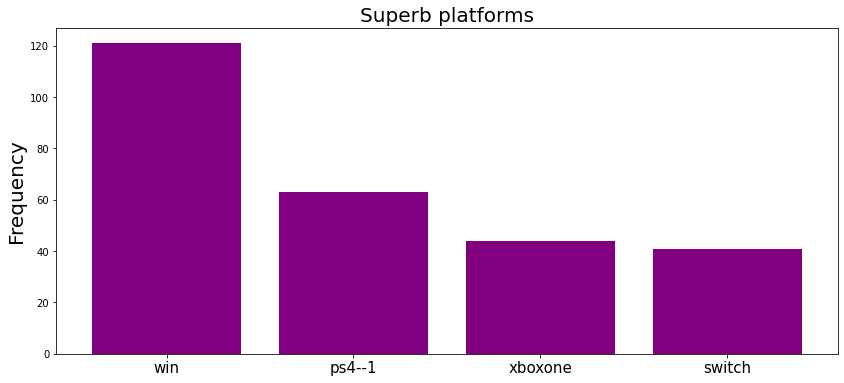

In [13]:
fig, ax = plt.subplots(figsize = (14,6))

ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values,
          color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Superb platforms", size = 20)
plt.xticks(fontsize = 15)

In [ ]:
to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index

In [27]:
to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values

array([121,  63,  44,  41])

In [76]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['PC (Microsoft Windows)', 'PlayStation4' , 'Xbox One' , 'Nintendo Switch'],
    y=[121, 63, 44,  41],
    marker_color=colors # marker color can be a single color value or an iterable
)])



fig.update_layout(title_text='Platforms', font=dict(size=17, color="black"))


fig.show()

In [ ]:
# df_subperb_rating["platforms"].value_counts().iloc[:4].index

In [ ]:
# to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index

In [ ]:
# to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values

In [ ]:
# df_subperb_rating["platforms"].value_counts().iloc[:4].index

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - Play Station 4 
    - X-box 1
    - Nintendo Switch

## These are the top 7 platforms for the lowest  ratings (bad, very bad , awful)

In [14]:
df_low3_rating = train[(train['rating_bin']== 'bad') | (train['rating_bin']== 'very_bad') | (train['rating_bin']== 'awful')]
df_low3_rating

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,lancoop,offlinecoop,onlinecoop,splitscreen,point-and-click,fighting,shooter,music,platform,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,First person,Third person,Bird view-Isometric,Text,Side view,Virtual Reality,AuditoryDrama,thriller,Science-Fiction,Action,horror,survival,Fantasy,historical,stealth,comedy,business,drama,non-fiction,kids,sandbox,Open-World,warfare,4x-explore-expand-exploit-and-exterminate,educational,mystery,party,romance,erotic,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStatio n Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
127219,126859,2020-02-29,"[role-playing-rpg, adventure]",Knights of Light: The Prologue,[win],knights-of-light-the-prologue,[Not available],[action],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bad
78534,101613,2018-05-25,[Not available],Vietcong,[win],vietcong--1,[Not available],[action],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bad
183290,8534,1994-06-05,[adventure],Zelda's Adventure,"[fds, philips-cd-i]",zeldas-adventure,[bird-view-slash-isometric],"[action, fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,very_bad
199663,13458,2012-09-27,[turn-based-strategy-tbs],Might & Magic Heroes VI: Danse Macabre,[win],might-and-magic-heroes-vi-danse-macabre,[bird-view-slash-isometric],[fantasy],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,very_bad
20110,50572,NaT,[Not available],Tengai Makyou II: Manjimaru,[Not available],tengai-makyou-ii-manjimaru--2,[Not available],[Not available],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,15262,1991-12-31,[fighting],Metal Masters,"[amiga, gb, atari-st]",metal-masters,[side-view],[Not available],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bad
49770,87285,2011-08-17,[Not available],Backgammon Masters,[ios],backgammon-masters,[Not available],[Not available],0,0,0,0,0,0,0,0,0,0,0,0,0

In [15]:
df_low3_rating = df_low3_rating.drop_duplicates(subset = "id")

Text(0.5, 1.0, 'platforms')

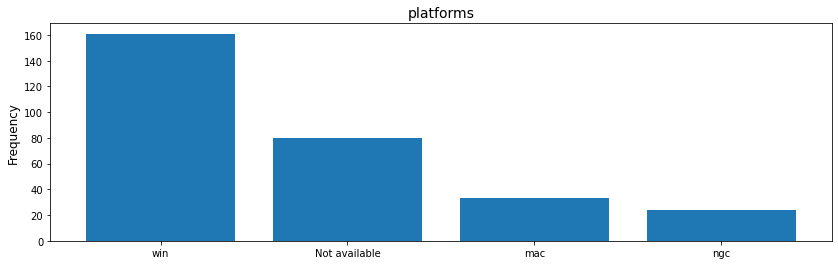

In [18]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["platforms"]).value_counts().iloc[:4].index,
        to_1D(df_low3_rating["platforms"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [17]:
df_low3_rating.platforms.value_counts()

[win]                                                 112
[Not available]                                        80
[linux, win, mac]                                      15
[ps2, ngc]                                             10
[ios]                                                  10
[ngc]                                                   7
[win, mac]                                              5
[mac]                                                   4
[3ds]                                                   3
[linux, win]                                            3
[nds]                                                   3
[win, ps4--1, xboxone, switch, ps5, series-x]           2
[win, android, ios]                                     2
[win, ps3, xbox360]                                     2
[gba]                                                   2
[android, ios]                                          2
[wii, win, ps2, ngc]                                    1
[win, ps2, xbo

---------

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [20]:
pd.set_option('display.max_columns', 500)
df_subperb_rating.head()

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,lancoop,offlinecoop,onlinecoop,splitscreen,point-and-click,fighting,shooter,music,platform,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,First person,Third person,Bird view-Isometric,Text,Side view,Virtual Reality,AuditoryDrama,thriller,Science-Fiction,Action,horror,survival,Fantasy,historical,stealth,comedy,business,drama,non-fiction,kids,sandbox,Open-World,warfare,4x-explore-expand-exploit-and-exterminate,educational,mystery,party,romance,erotic,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStatio n Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
199552,152122,2021-06-30,"[role-playing-rpg, simulator, adventure, indie...",Doki Doki Literature Club Plus!,"[win, mac, ps4--1, xboxone, switch, ps5]",doki-doki-literature-club-plus,[text],"[horror, romance]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb
120410,126489,2018-10-02,"[simulator, indie]",WorldBox: God Simulator,"[linux, win, android, ios]",worldbox-god-simulator,[bird-view-slash-isometric],[sandbox],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb
208393,1070,1990-11-21,"[platform, adventure]",Super Mario World,"[wii, snes, wiiu, sfam, new-nintendo-3ds]",super-mario-world,[side-view],"[action, fantasy]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb
172684,732,2004-10-26,"[shooter, racing, adventure]",Grand Theft Auto: San Andreas,"[win, ps2, ps3, xbox, xbox360, mac, android, i...",grand-theft-auto-san-andreas,"[first-person, third-person]","[action, non-fiction, open-world]",0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb
207486,120710,2020-08-07,"[point-and-click, adventure, indie]",The Henry Stickmin Collection,"[win, mac]",the-henry-stickmin-collection,[Not available],"[action, comedy]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,subperb


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

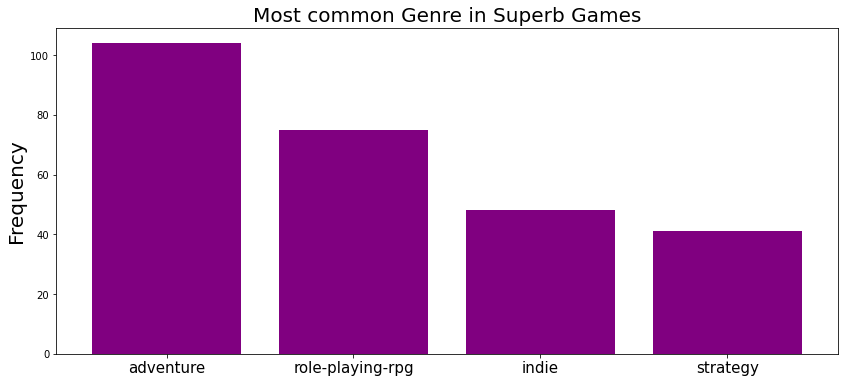

In [40]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)
plt.xticks(fontsize = 15)

In [42]:
(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].index)

Index(['adventure', 'role-playing-rpg', 'indie', 'strategy'], dtype='object')

In [43]:
(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].values)

array([104,  75,  48,  41])

In [77]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Adventure', 'Role-Playing-RPG' , 'Indie' , 'Strategy'],
    y=[104, 75, 48,  41],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Genre', font=dict(size=17, color="black"))

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
#         to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("genres", size = 14)

## Q 2.2 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?

Text(0.5, 1.0, 'genre')

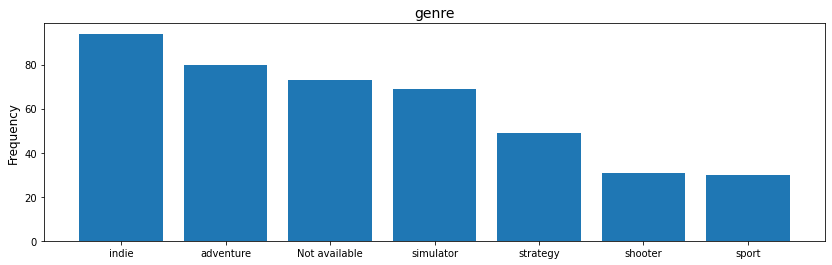

In [89]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genre", size = 14)

In [ ]:
# df_low2_rating = df2[(df2['rating_bin']== 'very_bad') | (df2['rating_bin']== 'awful')]
# df_low2_rating.head()
#this was not needed 

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

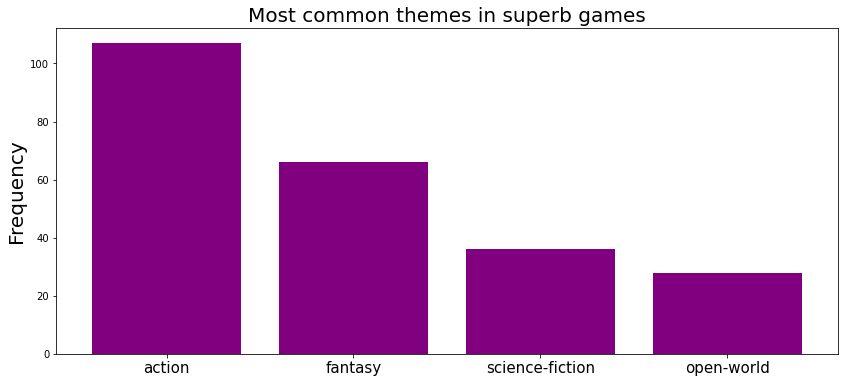

In [21]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].values,
           color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common themes in superb games", size = 20)
plt.xticks(fontsize = 15)

In [78]:
to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].index

Index(['action', 'fantasy', 'science-fiction', 'open-world'], dtype='object')

In [80]:
to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].values

array([107,  66,  36,  28])

In [82]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Action', 'Fantasy', 'Science-Fiction', 'Open-World'],
    y=[107,  66,  36,  28],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Themes', font=dict(size=17, color="black"))

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
#         to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("Themes", size = 14)

## Q3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

Text(0.5, 1.0, 'Themes')

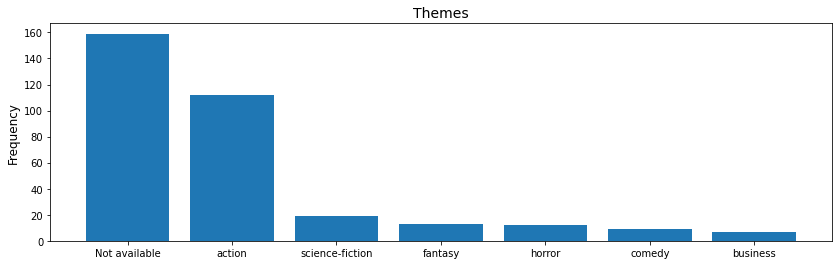

In [90]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

> since there is a gap time from game that can be played online and games that cannot- we decided to remove that gap and make sure that the games all come out in the same time period


### _answer:_ even after removing that time gap the games that are `NOT` multiplayer online games are rated higher than non-multiplayer games

In [ ]:
df2.head(2)

>## Not online multi

In [ ]:
#making sure all games are comming out of the same time period
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')

In [ ]:
train.onlinecoop.value_counts()

In [ ]:
NOT_online_multi = train[train['onlinecoop']== False]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')

In [ ]:
NOT_online_multi.head()

In [ ]:
NOT_online_multi.first_release_date.value_counts()

In [ ]:
NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

In [ ]:
NOT_online_multi.head()

In [ ]:
#1981 is the lowest date in online i will it cut it off there 

In [ ]:
NOT_online_multi = NOT_online_multi[NOT_online_multi['first_release_date_year'] > 1981.0]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

## Not online multi-player that games are after 1981

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=NOT_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

>##  online multi

In [ ]:
df_online_multi = df2[df2['onlinecoop']== True]
df_online_multi.head(1)

## Games that are after 1981 - Ratings 

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=df_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

### figuring out the time period for online games

In [ ]:
df_online_multi['first_release_date'] = pd.to_datetime(df_online_multi['first_release_date'],unit='s')

In [ ]:
df_online_multi.head(1)

In [ ]:
df_online_multi['first_release_date_year'] = df_online_multi.first_release_date.dt.year

In [ ]:
df_online_multi.first_release_date_year.value_counts()

 # Q 4- Does a certain game_mode determine the game rating?

In [ ]:
train.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["game_modes"]).value_counts().iloc[:7].index,
        to_1D(train["game_modes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- looks liek most common games are single and multi player, and co op 

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

- didnt find anything important

In [ ]:
train.head(3)

# What Are the most common player perspectives in 

In [ ]:
df_subperb_rating.player_perspectives.value_counts()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

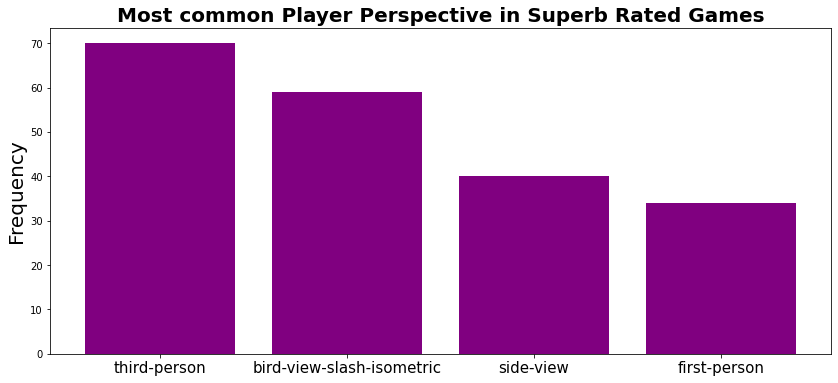

In [23]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].values,
         color= ['purple'])

ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Player Perspective in Superb Rated Games", size = 20, fontweight='bold')

plt.xticks(fontsize = 15)

In [83]:
to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].index

Index(['third-person', 'bird-view-slash-isometric', 'side-view',
       'first-person'],
      dtype='object')

In [84]:
to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].values

array([70, 59, 40, 34])

In [88]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Third-Person', 'Bird-view / Isometric', 'Side-View','First-Person'],
    y=[285, 226, 218,  11],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Player Perspectives',  font=dict(size=17, color="black"))

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

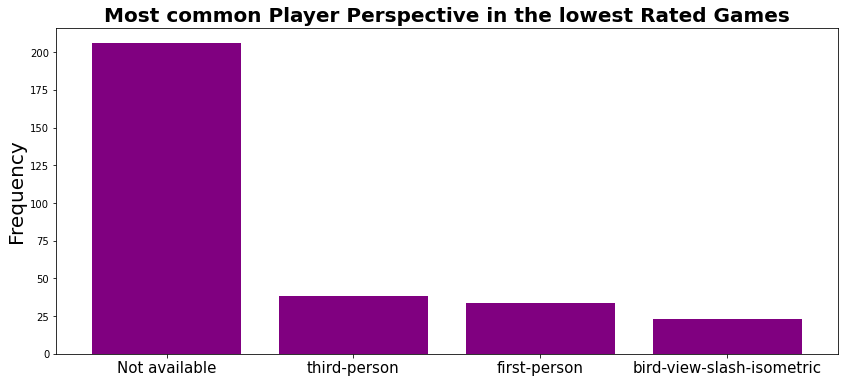

In [92]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_low3_rating["player_perspectives"]).value_counts().iloc[:4].index,
        to_1D(df_low3_rating["player_perspectives"]).value_counts().iloc[:4].values,
         color= ['purple'])

ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Player Perspective in the lowest Rated Games", size = 20, fontweight='bold')

plt.xticks(fontsize = 15)

- looks like the majority of the best games have third person and, bird view/isometric 

# what can i find more info on subperb ratings?

In [ ]:
df_subperb_rating

In [ ]:
df_subperb_rating.id.unique()

In [ ]:
print(df_subperb_rating["id"].unique())

In [ ]:
print(df_subperb_rating["id"].nunique())

In [ ]:
df_subperb_rating.id.value_counts()

In [ ]:
df_subperb_rating["id"]== 6440

In [ ]:
df_subperb_rating.loc[df_subperb_rating['id'] == 1070]

In [ ]:
df_subperb_rating.loc[df_subperb_rating['id'] == 6440]

In [ ]:
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

In [ ]:
df_subperb_rating